# Visualization of Gaussian Noise Added Example

## Loading Packages

In [23]:
import warnings
## filter out all warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2024)

## Loading Data

In [24]:
adata = sc.read_h5ad('../../Noise_Combination_1.h5ad')

## Adding Noise

In [ ]:
# Get the existing categories
categories = adata.obs['Ground Truth'].cat.categories

# Add the new category 'e'
categories = np.append(categories, 'e')
adata.obs['Ground Truth'] = adata.obs['Ground Truth'].cat.set_categories(categories)

random_indices = np.random.choice(adata.obs['Ground Truth'].index, size=1000, replace=False)

# Change the category of these points to 'e'
adata.obs.loc[random_indices, 'Ground Truth'] = 'e'

## Ploting 

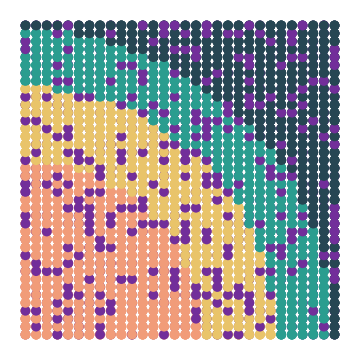

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
colors = [
    '#f19c79', '#e9c46a', '#2a9d8f', '#264653', '#722E9A'
]

plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = ['Arial']

sc.pl.embedding(adata, basis='spatial', color=['Ground Truth'], title=None, s=200, colorbar_loc=None, show=False, ax=ax, palette=colors, legend_loc=None)
ax.set_title("")
ax.set_xlabel('')
ax.set_ylabel('')

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()

plt.savefig('./Gaussian_Noise.png')
plt.savefig('./Gaussian_Noise.eps')

plt.show()